# Task: House Price Analysis and Prediction 
Submission: 15-07-2024 Submission date: 30-07-2024 

# Step-1  Data Cleaning and Exploration:


1.1 Import Libraries 

In [168]:
import numpy as np
import pandas as pd


1.2 Load the Dataset

In [169]:
df=pd.read_csv(r'D:\Data_science_Projects\Task-1\zameen-updated.csv')

1.3 Check Data set


In [170]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [171]:
df.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object

1.4 Clean the data: Handle Missing Values:

In [172]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

1.5  Drop columns with many missing values

Drop 'Agency' and 'agent' columns due to many missing  values

In [173]:
df.drop(columns=['agency','agent'], inplace=True)

In [174]:
# df.head()?

1.6 Fill missing values in numeric columns with median

In [175]:
numeric_cols=df.select_dtypes(include='number').columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].median)

1.7 Drop rows with missing values in non-numeric columns

In [176]:
df.dropna(subset=df.select_dtypes(exclude='number').columns, inplace=True)

1.8 Handle Inconsistencies:

In [177]:
# Convert 'date_added' to datetime with appropriate format
df['date_added'] = pd.to_datetime(df['date_added'], format='%m/%d/%Y', errors='coerce')

# Verify the conversion
print(df['date_added'].head())

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: date_added, dtype: datetime64[ns]


1.9 Identify and Handle Outliers

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

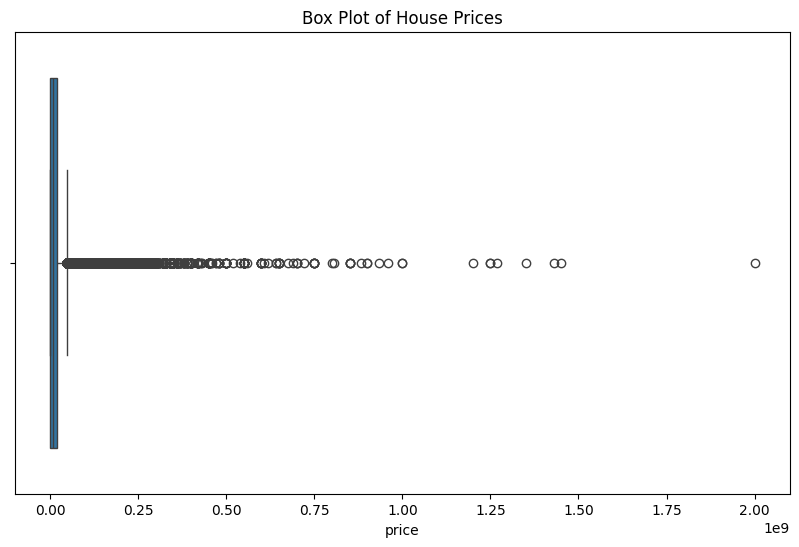

In [179]:
# Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of House Prices')
plt.show()

# Removing outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]

1.10 Explore data:  Analyze the Distribution of House Prices:

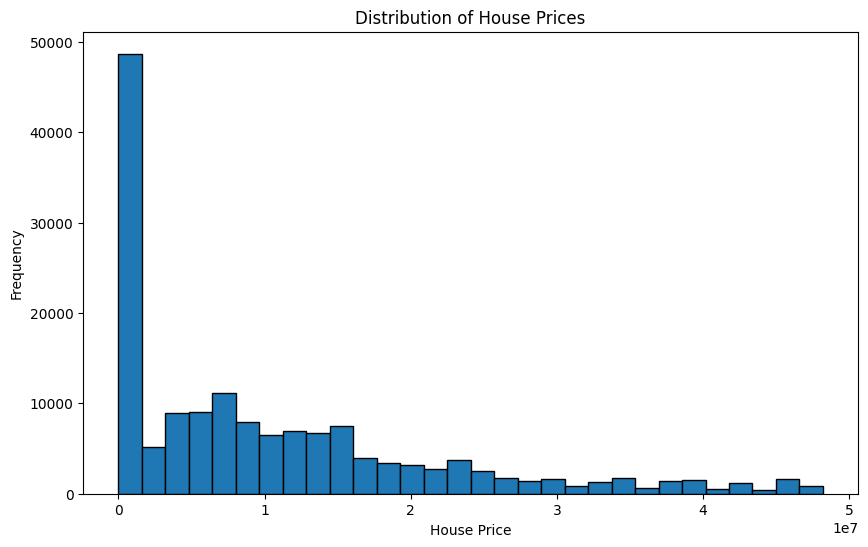

In [180]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

1.10 Analyze Relationships Between Features and Price:

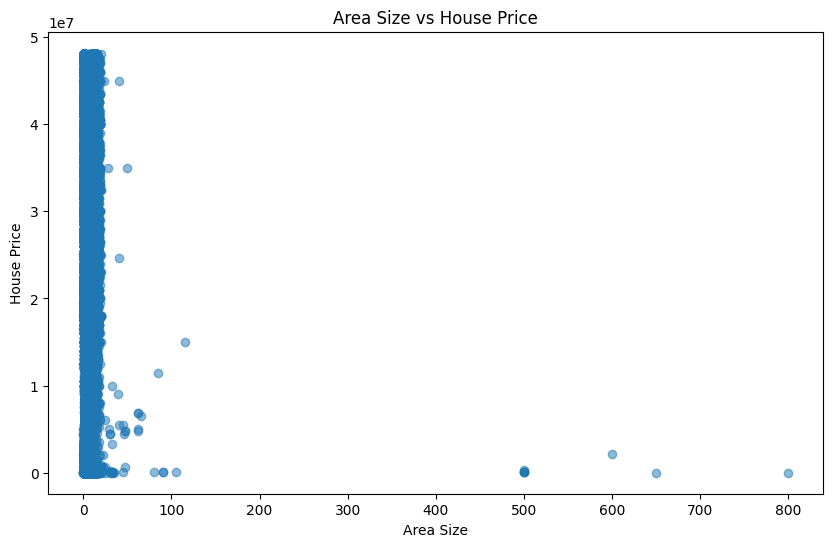

In [181]:
# Scatter plot for 'Area Size' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['Area Size'], df['price'], alpha=0.5)
plt.xlabel('Area Size')
plt.ylabel('House Price')
plt.title('Area Size vs House Price')
plt.show()

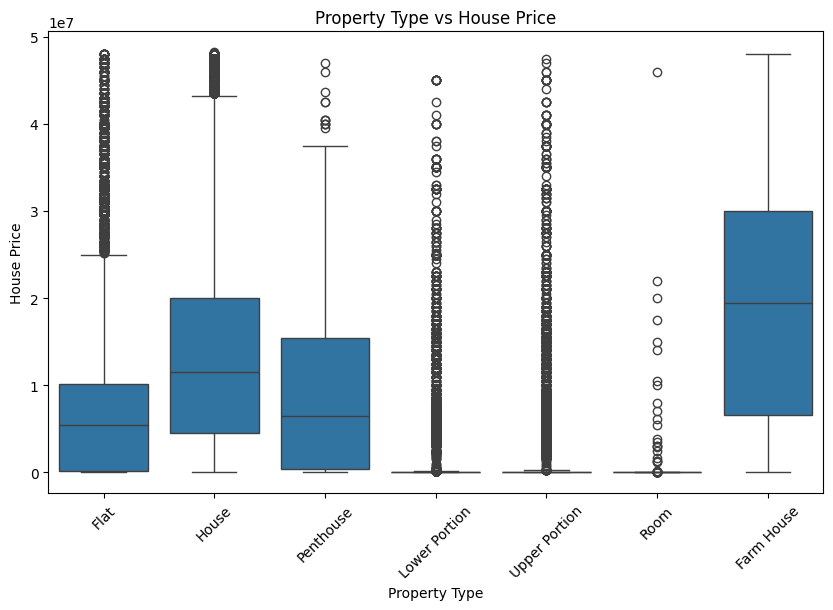

In [182]:
# Box plot for 'property_type' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['property_type'], y=df['price'])
plt.xlabel('Property Type')
plt.ylabel('House Price')
plt.title('Property Type vs House Price')
plt.xticks(rotation=45)
plt.show()

Correlation Analysis:

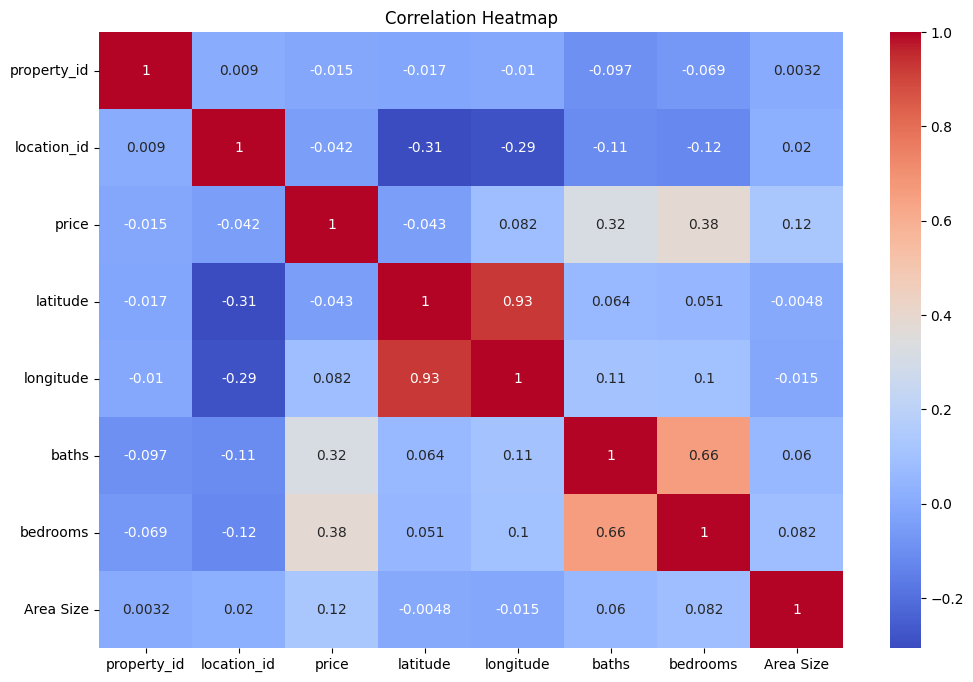

In [183]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 2. Feature Engineering

2.1 Age of the House:

In [184]:
# Assuming the current year is 2024
current_year = 2024

# Create a new feature 'house_age'
df['house_age'] = current_year - df['date_added'].dt.year


In [189]:
# Convert 'date_added' to datetime with appropriate format
df['date_added'] = pd.to_datetime(df['date_added'], format='%m/%d/%Y', errors='coerce')

# Verify the conversion
print(df['date_added'].head())

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: date_added, dtype: datetime64[ns]


2.2 Price Per Area:

In [190]:
# create a feature price per area 
df['price_per_area']= df['price']/ df['Area Size']
df.price_per_area

0         2.500000e+06
1         1.232143e+06
2         2.062500e+06
3         2.175000e+07
4         8.750000e+05
              ...     
168441    2.760417e+06
168442    1.562500e+06
168443    2.812500e+06
168444    1.410256e+06
168445    9.574468e+05
Name: price_per_area, Length: 154899, dtype: float64

2.3 Encode Categorical Features

In [191]:
# one-hot encode 
df=pd.get_dummies(df, columns=['property_type', 'location'], drop_first=True)

In [120]:
# df.head()

2.4 Label encoding

In [192]:
from sklearn.preprocessing import LabelEncoder
Label_encoder= LabelEncoder()
df['city']= Label_encoder.fit_transform(df['city'])
df['province_name']=Label_encoder.fit_transform(df['province_name'])


#  step-3 Outlier Analysis

In [193]:
# outliers DataFrame 
outliers_df =df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers_df)


Empty DataFrame
Columns: [property_id, location_id, page_url, price, city, province_name, latitude, longitude, baths, area, purpose, bedrooms, date_added, Area Type, Area Size, Area Category, house_age, price_per_area, property_type_Flat, property_type_House, property_type_Lower Portion, property_type_Penthouse, property_type_Room, property_type_Upper Portion, location_204 Chak Road, location_7th Avenue, location_9th Avenue, location_AGHOSH, location_APP Employees Co-operative Housing Society, location_AR Cottages, location_ASF Housing Scheme, location_ASF Tower, location_AWT Army Welfare Trust, location_Aabpara Coop Housing Society, location_Aashiana Road, location_Abbaspur, location_Abdali Road, location_Abdalians Cooperative Housing Society, location_Abdul Sattar Edhi Road, location_Abdullah Ahmed Road, location_Abdullah City, location_Abdullah Garden, location_Abdullah Haroon Road, location_Abdullah Town, location_Abdullahpur, location_Abid Majeed Road, location_Abid Market, locati

2.6 Compare Outliers with Non-Outliers:

In [194]:
# Non-outliers DataFrame
non_outliers_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Summary statistics for comparison
print("Outliers Summary Statistics:")
print(outliers_df.describe())

print("\nNon-Outliers Summary Statistics:")
print(non_outliers_df.describe())


Outliers Summary Statistics:
       property_id  location_id  price  city  province_name  latitude  \
count          0.0          0.0    0.0   0.0            0.0       0.0   
mean           NaN          NaN    NaN   NaN            NaN       NaN   
min            NaN          NaN    NaN   NaN            NaN       NaN   
25%            NaN          NaN    NaN   NaN            NaN       NaN   
50%            NaN          NaN    NaN   NaN            NaN       NaN   
75%            NaN          NaN    NaN   NaN            NaN       NaN   
max            NaN          NaN    NaN   NaN            NaN       NaN   
std            NaN          NaN    NaN   NaN            NaN       NaN   

       longitude  baths  bedrooms date_added  Area Size  house_age  \
count        0.0    0.0       0.0          0        0.0        0.0   
mean         NaN    NaN       NaN        NaT        NaN        NaN   
min          NaN    NaN       NaN        NaT        NaN        NaN   
25%          NaN    NaN       NaN

c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


2.7 Visualize Differences:

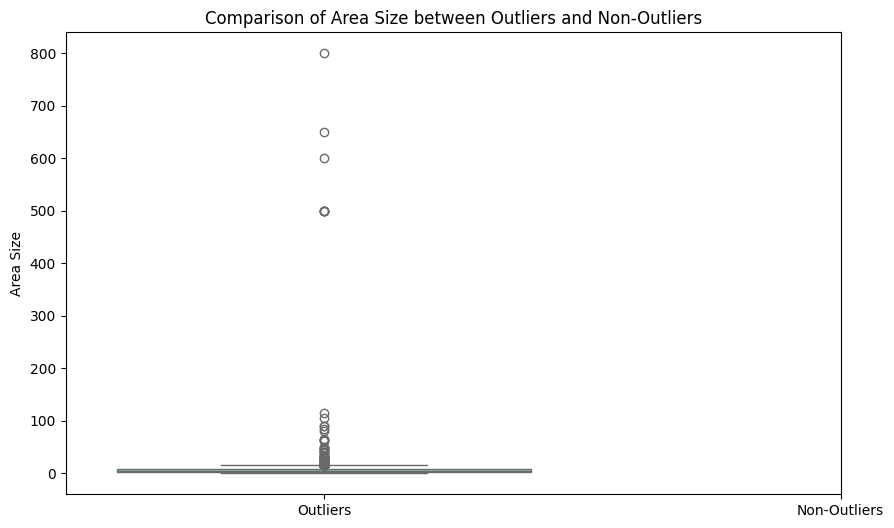

In [198]:
# Box plot for 'Area Size' for outliers and non-outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=[outliers_df['Area Size'], non_outliers_df['Area Size']], palette="Set3")
plt.xticks([0, 1], ['Outliers', 'Non-Outliers'])
plt.ylabel('Area Size')
plt.title('Comparison of Area Size between Outliers and Non-Outliers')
plt.show()

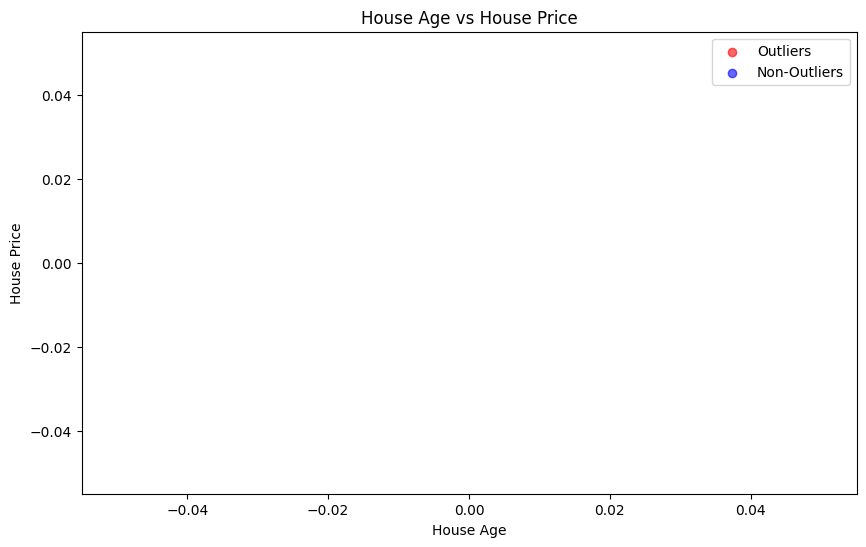

In [199]:

# Scatter plot for 'house_age' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(outliers_df['house_age'], outliers_df['price'], color='red', label='Outliers', alpha=0.6)
plt.scatter(non_outliers_df['house_age'], non_outliers_df['price'], color='blue', label='Non-Outliers', alpha=0.6)
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.title('House Age vs House Price')
plt.legend()
plt.show()

2.8  Correlation Analysis:

c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


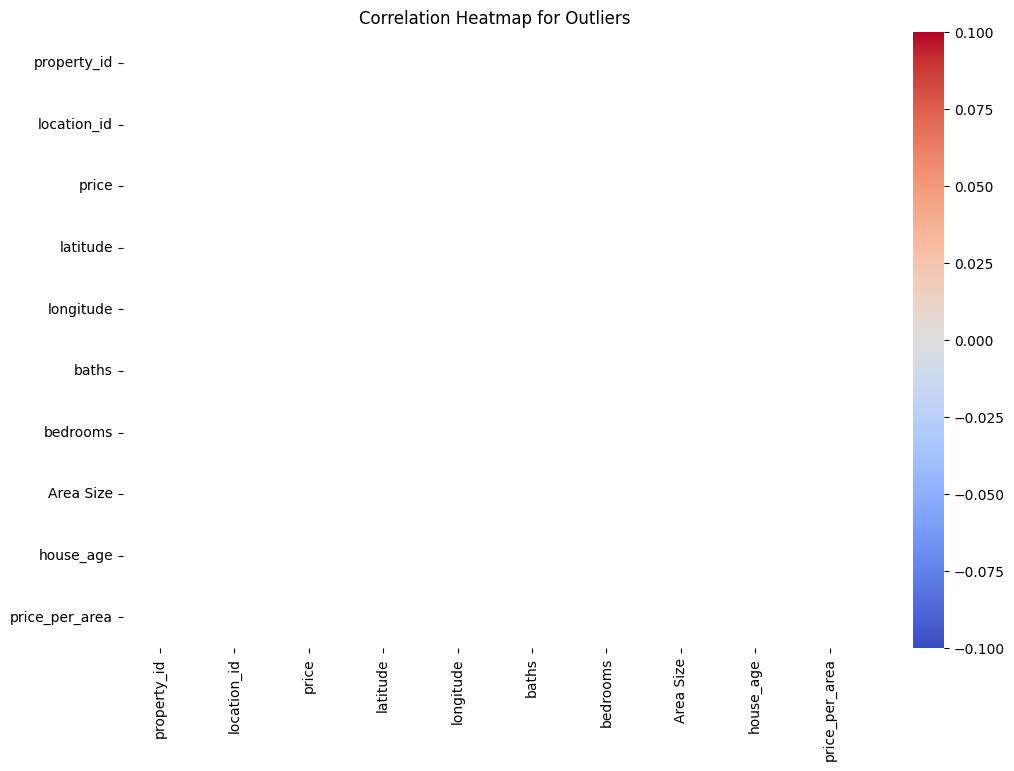

In [200]:
# Correlation heatmap for outliers
numeric_outliers_df = outliers_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_outliers = numeric_outliers_df.corr()
sns.heatmap(corr_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Outliers')
plt.show()

c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


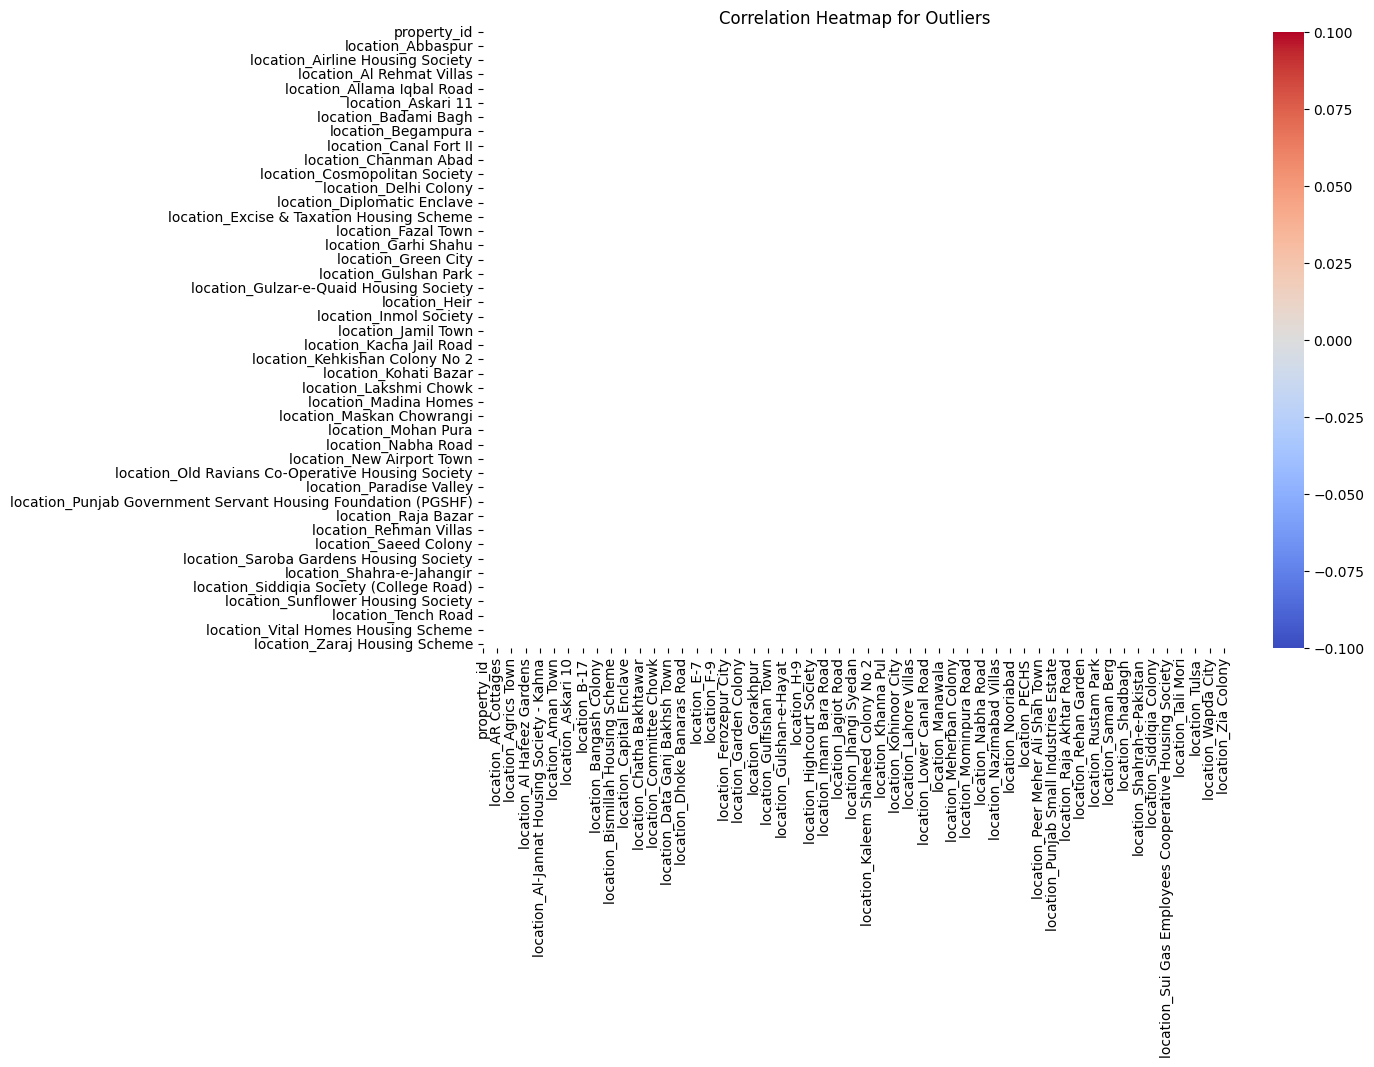

In [127]:
# Correlation heatmap for outliers
plt.figure(figsize=(12, 8))
corr_outliers = outliers_df.corr()
sns.heatmap(corr_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Outliers')
plt.show()


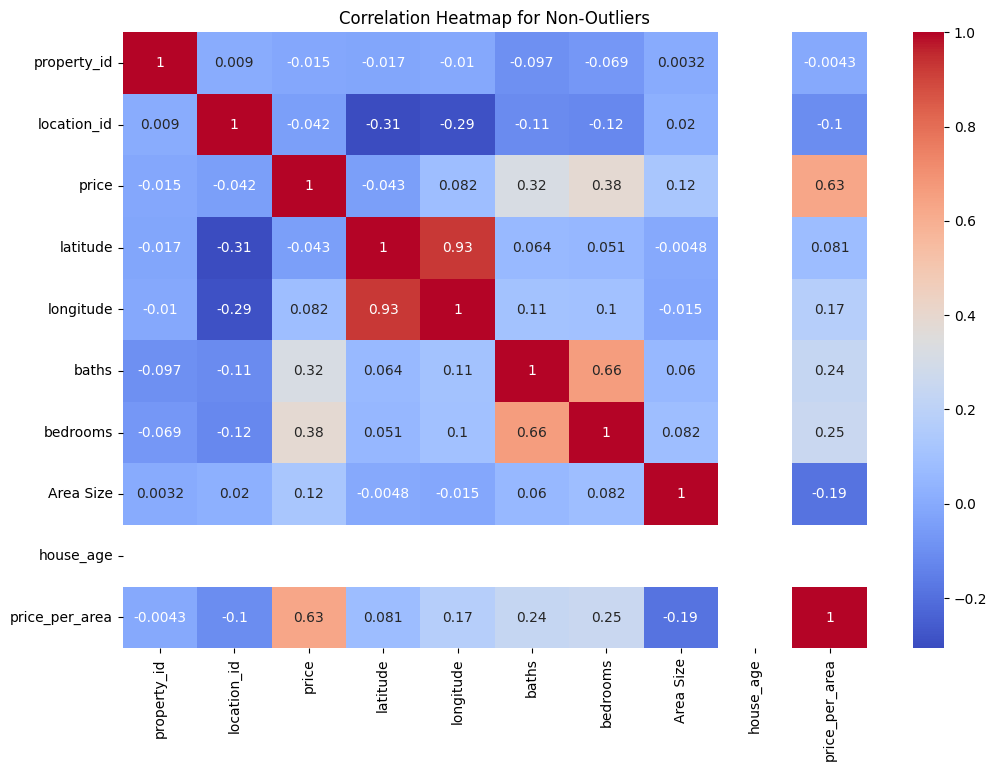

In [201]:

# Correlation heatmap for non-outliers
numeric_non_outliers_df = non_outliers_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_non_outliers = numeric_non_outliers_df.corr()
sns.heatmap(corr_non_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Non-Outliers')
plt.show()

# Step-4 Predictive Modeling

# 5. Future Price Prediction:

4.1 prepare the data

In [ ]:
from sklearn.model_selection import train_test_split

# feature and target variables are:
x= df.drop(columns=['price'])
y= df['price']

# split the date into training and testing sets 
X_train, X_test, 